```{contents}
```

## ReLU

**ReLU (Rectified Linear Unit)** is a widely used activation function in deep learning, especially for hidden layers of deep neural networks.

It introduces **non-linearity** while being computationally efficient.

### Formula:

$$
f(z) = \max(0, z)
$$

Where $z = \sum_{i=1}^{n} w_i x_i + b$ (weighted sum of inputs + bias).

* If $z > 0$, output = $z$
* If $z \leq 0$, output = 0

---

### Intuition Behind ReLU

1. **Non-linear transformation:**

   * Even though it looks simple, it allows neural networks to model complex non-linear relationships.
2. **Sparsity in activation:**

   * For negative inputs, the neuron “shuts off” (output = 0). This creates sparse activations, which often improves learning efficiency.
3. **Efficient computation:**

   * Only requires a simple comparison with zero, no expensive exponentials like sigmoid or tanh.
4. **Gradient propagation:**

   * For positive inputs, the derivative is 1, which helps avoid the vanishing gradient problem that sigmoid/tanh suffer from.

Think of it as a **switch**:

* Positive inputs → neuron “fires”
* Negative inputs → neuron “silent”

---

### Graphical Representation

![](../images/relu.png)

* Flat at (z ≤ 0) (output = 0)
* Linear at (z > 0) (output = z)

---

### Derivative of ReLU

$$
f'(z) =
\begin{cases}
0 & \text{if } z \leq 0 \
1 & \text{if } z > 0
\end{cases}
$$

* Positive inputs: gradient = 1 → **no vanishing gradient**
* Negative inputs: gradient = 0 → neuron stops learning (can cause “dying ReLU” problem)

---

### Advantages of ReLU

✔️ **Prevents vanishing gradient** for positive activations
✔️ **Computationally efficient** (simple max operation)
✔️ Encourages **sparse activations** → more efficient and interpretable models
✔️ Works very well in **deep networks**

---

### Limitations of ReLU

❌ **Dying ReLU problem:**

* Some neurons may output 0 for all inputs and stop learning entirely
  ❌ Not zero-centered → can slow down convergence slightly
  ❌ Outputs can grow very large → can cause exploding activations (usually handled by batch normalization or careful initialization)

---

### Variants of ReLU

1. **Leaky ReLU:**

   * Allows a small gradient for (z < 0)
     $$
     f(z) =
     \begin{cases}
     0.01z & z < 0 \
     z & z ≥ 0
     \end{cases}
     $$

2. **Parametric ReLU (PReLU):**

   * The negative slope is learned during training

3. **ELU (Exponential Linear Unit):**

   * Smooths negative values instead of being flat at 0


---

**Intuition in One Line**

ReLU is like a “neuron switch” that only activates when the input is positive, keeping learning fast and avoiding vanishing gradients.


Sure! Let’s break down **Leaky ReLU** and **Parametric ReLU (PReLU)** in detail, including the intuition, math, and why they exist.

---

### 1. **Leaky ReLU (LReLU)**

#### **Problem it solves:**

The standard **ReLU** is:

$$
f(x) = \max(0, x)
$$

* If $x > 0$, output is (x)
* If $x \le 0$, output is (0)

**Issue:**

* **Dying ReLU problem**: Neurons can get “stuck” in the negative region, always outputting 0, and their weights never update.
* This happens because the gradient is 0 for (x < 0).

#### **Leaky ReLU Solution:**

Instead of outputting 0 for negative values, we allow a small, non-zero gradient:

$$
f(x) =
\begin{cases}
x & \text{if } x > 0 \
\alpha x & \text{if } x \le 0
\end{cases}
$$

* $\alpha$ is a small constant, usually 0.01.
* This means even for negative inputs, the neuron can still learn.

#### **Graph Intuition:**

* Positive side: same as ReLU (linear)
* Negative side: slight slope (not flat)



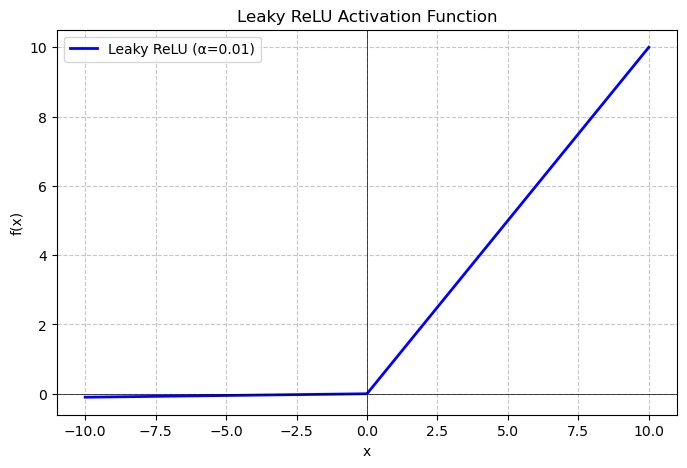

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Leaky ReLU function
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# Generate x values
x = np.linspace(-10, 10, 400)
y = leaky_relu(x)

# Plot
plt.figure(figsize=(8,5))
plt.plot(x, y, label="Leaky ReLU (α=0.01)", color="blue", linewidth=2)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title("Leaky ReLU Activation Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



---

## 2. **Parametric ReLU (PReLU)**

### **What’s different from Leaky ReLU:**

* Instead of using a fixed $\alpha$ like in Leaky ReLU, **PReLU learns $\alpha$ during training**.
* Formula:

$$
f(x) =
\begin{cases}
x & \text{if } x > 0 \
a x & \text{if } x \le 0
\end{cases}
$$

* Here, $a$ is a learnable parameter, updated by backpropagation.

### **Why it helps:**

* Some neurons might benefit from a larger slope in the negative region, others from a smaller slope.
* Gives more flexibility than fixed Leaky ReLU.

### **Graph Intuition:**

* Positive side: linear (same as ReLU)
* Negative side: slope is learned (can be small, moderate, or even large)

---

### Summary Table

| Feature           | ReLU | Leaky ReLU                  | PReLU                     |
| ----------------- | ---- | --------------------------- | ------------------------- |
| Negative output   | 0    | small fraction ((\alpha x)) | learnable fraction ((ax)) |
| Solves Dying ReLU | ❌    | ✅                           | ✅                         |
| Trainable slope   | ❌    | ❌                           | ✅                         |

---

**Key Intuition:**

* Leaky ReLU → prevent neurons from dying, fixed small slope.
* PReLU → prevent neurons from dying, slope adapts during training.

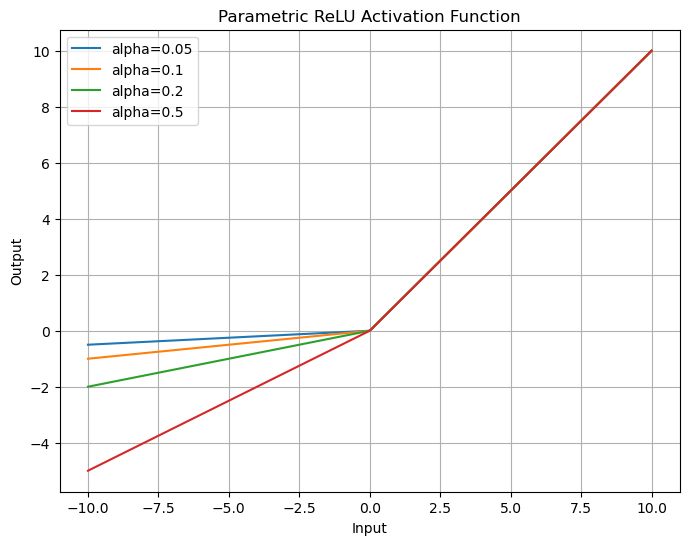

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define Parametric ReLU function
def parametric_relu(x, alpha=0.1):
    return np.where(x >= 0, x, alpha * x)

# Values for x-axis
x = np.linspace(-10, 10, 400)

# Plot for different alpha values
alphas = [0.05, 0.1, 0.2, 0.5]
plt.figure(figsize=(8,6))
for alpha in alphas:
    y = parametric_relu(x, alpha=alpha)
    plt.plot(x, y, label=f'alpha={alpha}')

plt.title("Parametric ReLU Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()
